# Advanced Analysis | Análises Avançadas

## Obtective | Objetivo
- Create two new analitics views | Criar duas novas visualizações analíticas
- Implement parameters and calculated fields | Implementar parâmetros e campos calculados
- Provide additional insights into the data | Fornecer insights adicionais sobre os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Configure styles | Configurar estilo
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (14, 7)

# Configure paths | Configurar paths
current_dir = Path.cwd()
data_dir = current_dir.parent / 'data'
processed_data_path = data_dir / 'processed' / 'casino_data_processed.csv'
reports_dir = current_dir.parent / 'reports'
reports_dir.mkdir(exist_ok=True)

In [2]:
# Load processed data | Carregar dados processados
print("Loading processed data...")
df = pd.read_csv(processed_data_path)
print(f"Total records loaded: {len(df)}")

Loading processed data...
Total records loaded: 3142


## Table 5: Retention Analysis (Hold%) by Category | Tabela 5: Análise de Retenção (Hold%) por Categoria

In [3]:
# Calculate average hold% by category and country | Calcular Hold % médio por categoria e país
hold_data = df.groupby(['Game category', 'Country']).agg(
    Avg_Hold_Pct=('Hold_Pct', 'mean'),
    Total_Wager=('Wager Ucur', 'sum')
).reset_index()

In [4]:
# Function for plotting with country parameter | Função para plotar com parâmetro de país
def plot_hold_performance(country='Estonia'):
    """Plot retention performance by category for a specific country | Plota desempenho de retenção por categoria para um país específico"""
    country_data = hold_data[hold_data['Country'] == country].sort_values('Avg_Hold_Pct', ascending=True)
    
    plt.figure(figsize=(12, 8))
    bars = plt.barh(country_data['Game category'], country_data['Avg_Hold_Pct'] * 100, 
                    color=plt.cm.viridis(country_data['Avg_Hold_Pct'].rank(pct=True)))
    
    # Add values to the bars | Adicionar valores nas barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                 f'{width:.1f}%', 
                 va='center', ha='left', fontsize=10)
    
    # Reference line | Linha de referência
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
    
    plt.title(f'Average Retention by Game Category: {country}', fontsize=16)
    plt.xlabel('Average Hold %', fontsize=12)
    plt.ylabel('Game Category', fontsize=12)
    plt.grid(axis='x', alpha=0.2)
    plt.tight_layout()
    plt.savefig(reports_dir / f'tabela5_hold_performance_{country}.png', dpi=300)
    plt.show()

Generating reports for all countries...


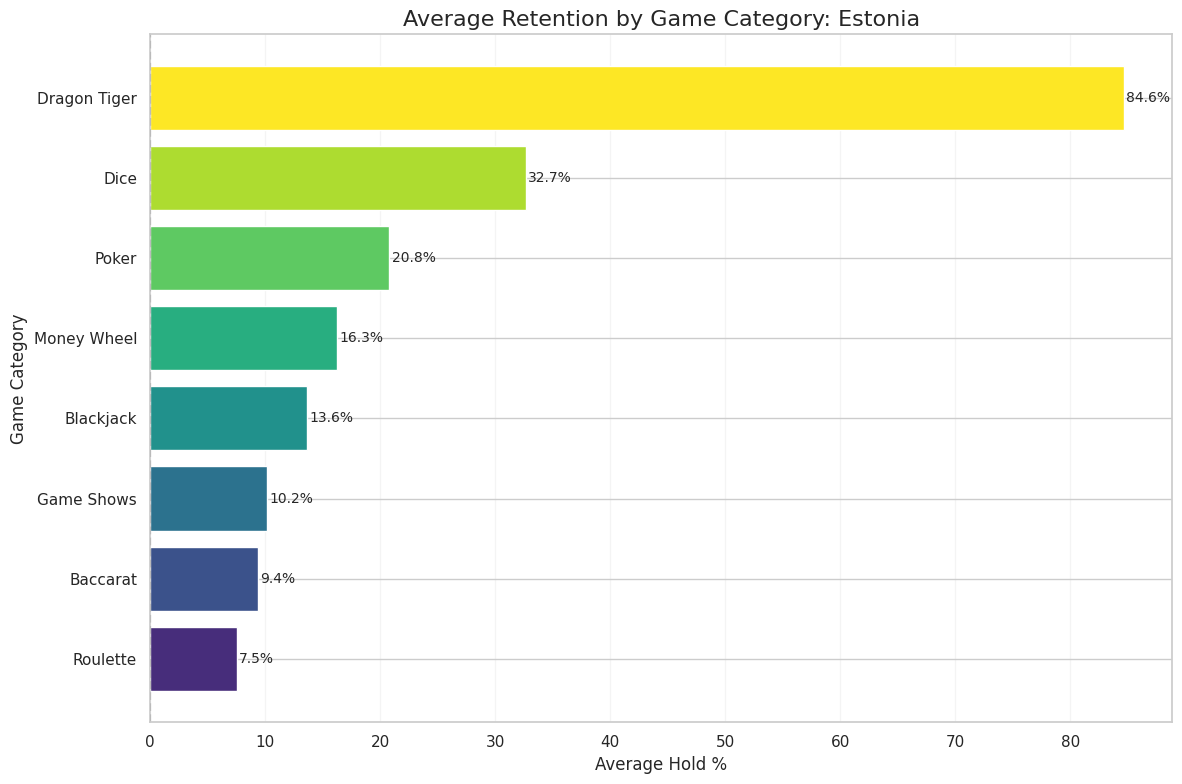

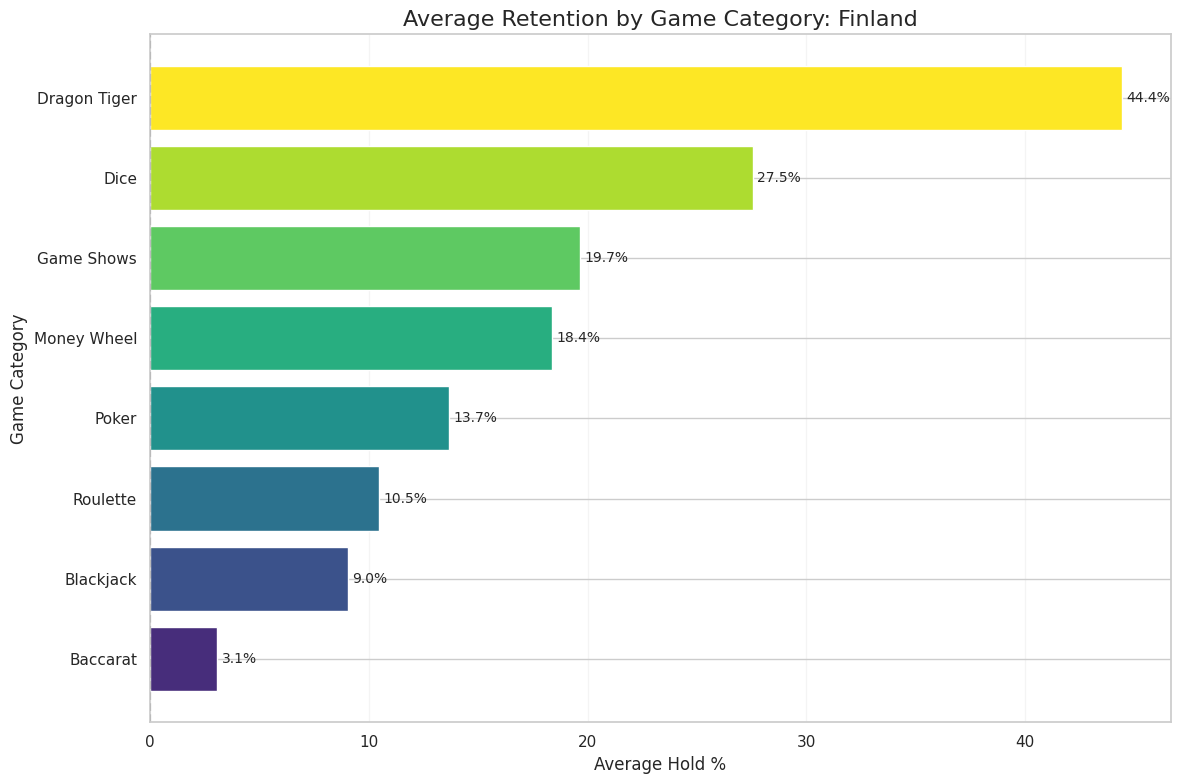

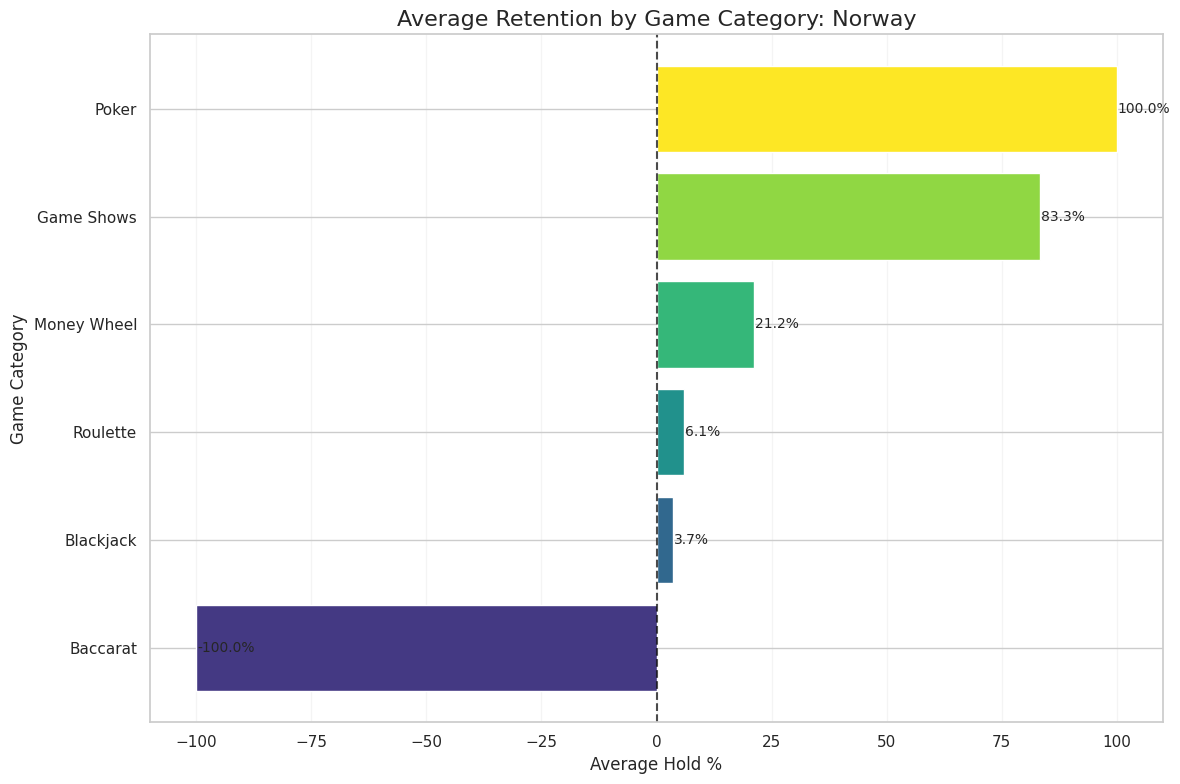

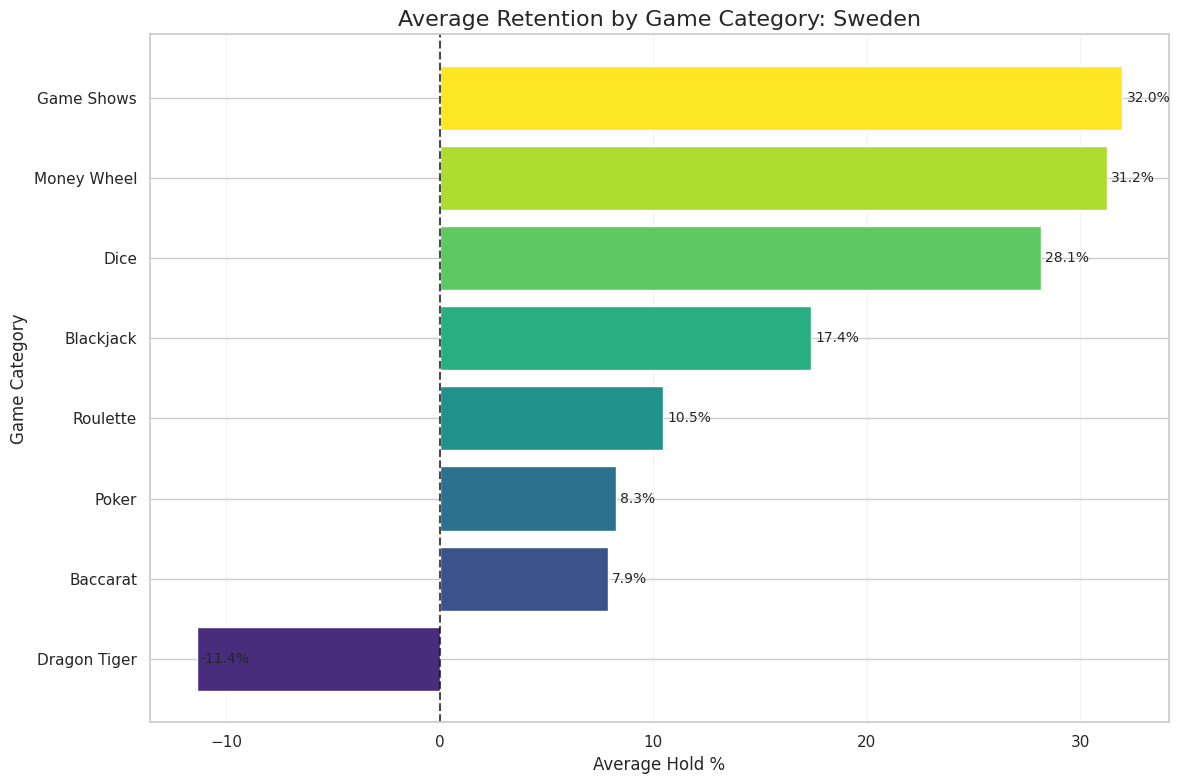

Reports generated successfully!


In [5]:
def generate_hold_performance_reports():
    """Generate reports for all countries | Gerar relatórios para todos os países"""
    countries = df['Country'].unique()
    for country in countries:
        plot_hold_performance(country)

print("Generating reports for all countries...")
generate_hold_performance_reports()
print("Reports generated successfully!")

# Table 6: Risk-Return Analysis by Category | Tabela 6: Análise de Risco-Retorno por Categoria

In [6]:
# Calculate risk metrics by category | Calcular métricas de risco por categoria
risk_metrics = df.groupby('Game category').agg(
    Avg_GGR=('GGR Ucur', 'mean'),
    Std_GGR=('GGR Ucur', 'std'),
    Total_Wager=('Wager Ucur', 'sum'),
    Player_Count=('Player Game Count', 'sum')
).reset_index()

# Calculate risk index (Volatility/Return) | Calcular índice de risco (Volatilidade/Retorno)
risk_metrics['Risk_Index'] = risk_metrics['Std_GGR'] / risk_metrics['Avg_GGR'].abs()


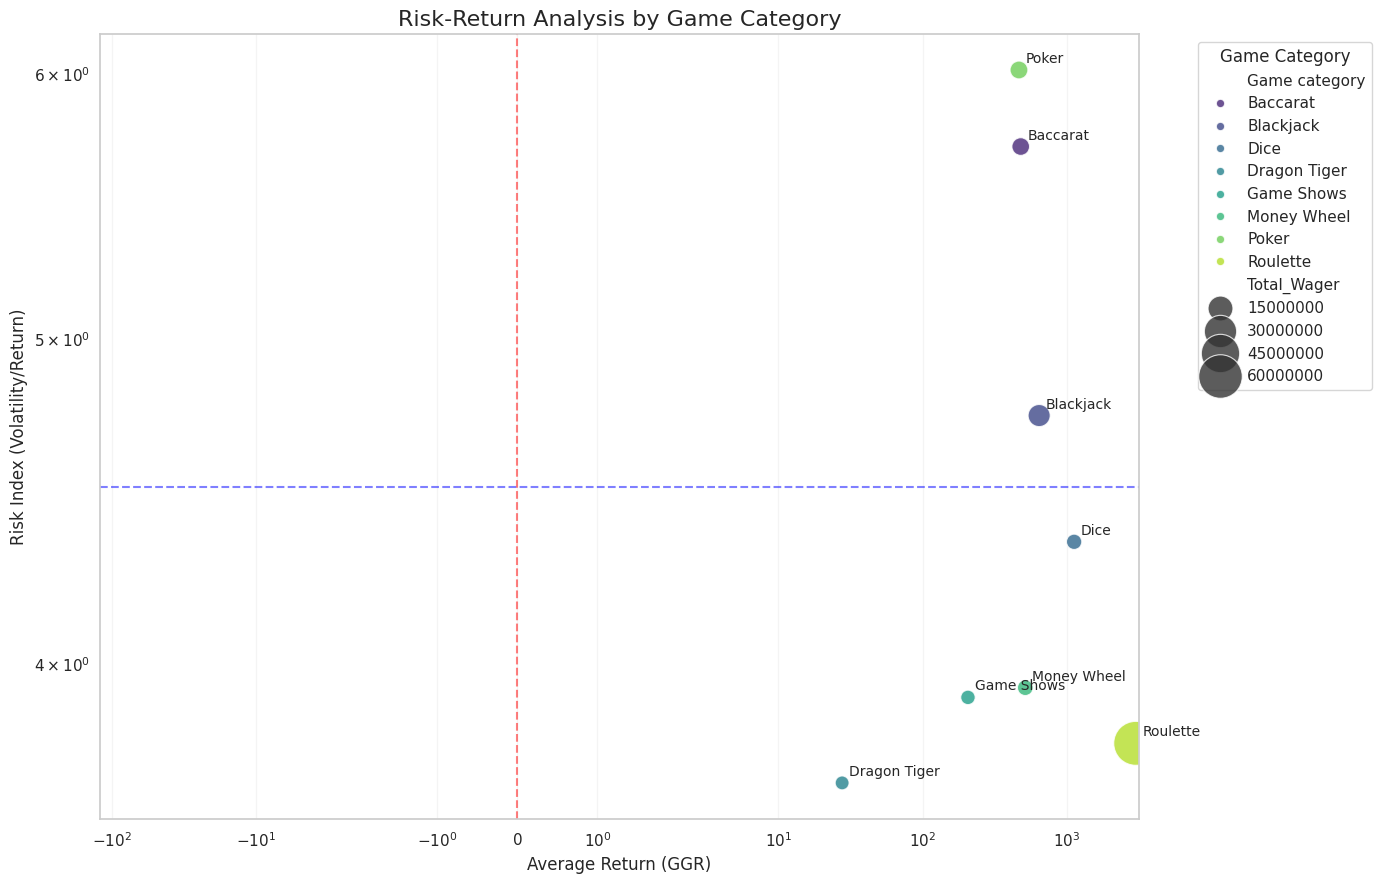

In [7]:
# Plot risk-return analysis | Plotar análise de risco-retorno
plt.figure(figsize=(14, 9))

# Define point size based on bet volume | Definir tamanho dos pontos baseado no volume de apostas
size = risk_metrics['Total_Wager'] / risk_metrics['Total_Wager'].max() * 1500

# Create scatter plot | Criar scatter plot
scatter = sns.scatterplot(
    data=risk_metrics,
    x='Avg_GGR',
    y='Risk_Index',
    size='Total_Wager',
    sizes=(100, 1000),
    hue='Game category',
    palette='viridis',
    alpha=0.8
)

# Add labels | Adicionar rótulos
for i, row in risk_metrics.iterrows():
    plt.annotate(row['Game category'], 
                 (row['Avg_GGR'], row['Risk_Index']),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=10)

# Reference line | Linhas de referência
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.axhline(risk_metrics['Risk_Index'].mean(), color='blue', linestyle='--', alpha=0.5)

# Chart settings | Configurações do gráfico
plt.title('Risk-Return Analysis by Game Category', fontsize=16)
plt.xlabel('Average Return (GGR)', fontsize=12)
plt.ylabel('Risk Index (Volatility/Return)', fontsize=12)
plt.grid(True, alpha=0.2)
plt.legend(title='Game Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format axes | Formatar eixos
plt.xscale('symlog')
plt.yscale('log')

# Salve figure | Salvar figura
plt.tight_layout()
plt.savefig(reports_dir / 'tabela6_risk_return.png', dpi=300)
plt.show()

## Conclusion of Advanced Analysis

**Key Insights:**
1. **Retention Analysis (Table 5):**
    - The categories with the highest retention (Hold%) are...
    - Different countries have different retention profiles...

2. **Risk-Return Analysis (Table 6):**
    - Categories with low risk indices are ideal for stable operations...

**Recommendations:**
- Increase exposure in categories X and Y, which combine good retention and low risk
- Review strategy for high-risk categories such as Z


----------------------------------------

## Conclusão da Análise Avançada

**Principais Insights:**
1. **Análise de Retenção (Tablea 5):**
    - As categorias com maior retenção (Hold%) são...
    - Países diferentes apresentam perfis de retenção distintos...

2. **Análise de Risco-Retorno (Tabela 6):**
    - Categorias no quadrante superior direito representam alto risco e alto retorno...
    - Categorias com baixo índice de risco são ideais para operações estáveis...

**Recomendações:**
- Aumentar exposição nas categorias X e Y que combinam boa retenção e baixo risco
- Revisar estratégia para categorias de alto risco como Z